<h2>Exploratory Data Analysis (EDA)<h2>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:/Data/PDF_Malware/PDFMalware2022.csv")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


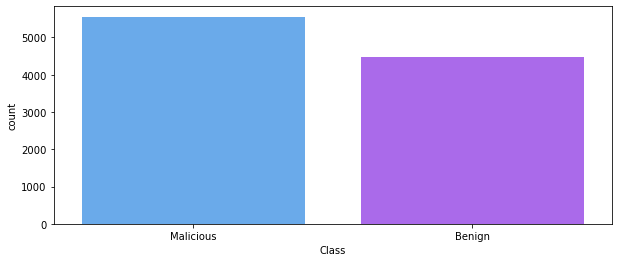

In [8]:
#Plotting of "Malicious", "Benigin" classes with size comparision
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(x="Class", data=data, palette="cool")
plt.show()

In [9]:
#Missing values

data.isna().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [10]:
#Percentage of missing values in each column

per_of_missing = 100 * (data.isna().sum()/data.shape[0])
per_of_missing

Fine name           0.000000
pdfsize             0.009974
metadata size       0.009974
pages               0.009974
xref Length         0.009974
title characters    0.009974
isEncrypted         0.009974
embedded files      0.009974
images              0.009974
text                0.009974
header              0.009974
obj                 0.029922
endobj              0.029922
stream              0.029922
endstream           0.029922
xref                0.029922
trailer             0.029922
startxref           0.029922
pageno              0.029922
encrypt             0.029922
ObjStm              0.029922
JS                  0.029922
Javascript          0.029922
AA                  0.029922
OpenAction          0.029922
Acroform            0.029922
JBIG2Decode         0.029922
RichMedia           0.029922
launch              0.029922
EmbeddedFile        0.029922
XFA                 0.029922
Colors              0.029922
Class               0.009974
dtype: float64

In [11]:
#Features exploration

T_class = data["Class"]
features = data.drop("Class", axis=1)

In [12]:
features = features.drop(['Fine name'], axis=1)
list(features.columns)

['pdfsize',
 'metadata size',
 'pages',
 'xref Length',
 'title characters',
 'isEncrypted',
 'embedded files',
 'images',
 'text',
 'header',
 'obj',
 'endobj',
 'stream',
 'endstream',
 'xref',
 'trailer',
 'startxref',
 'pageno',
 'encrypt',
 'ObjStm',
 'JS',
 'Javascript',
 'AA',
 'OpenAction',
 'Acroform',
 'JBIG2Decode',
 'RichMedia',
 'launch',
 'EmbeddedFile',
 'XFA',
 'Colors']

D:\Anaconda.pac\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


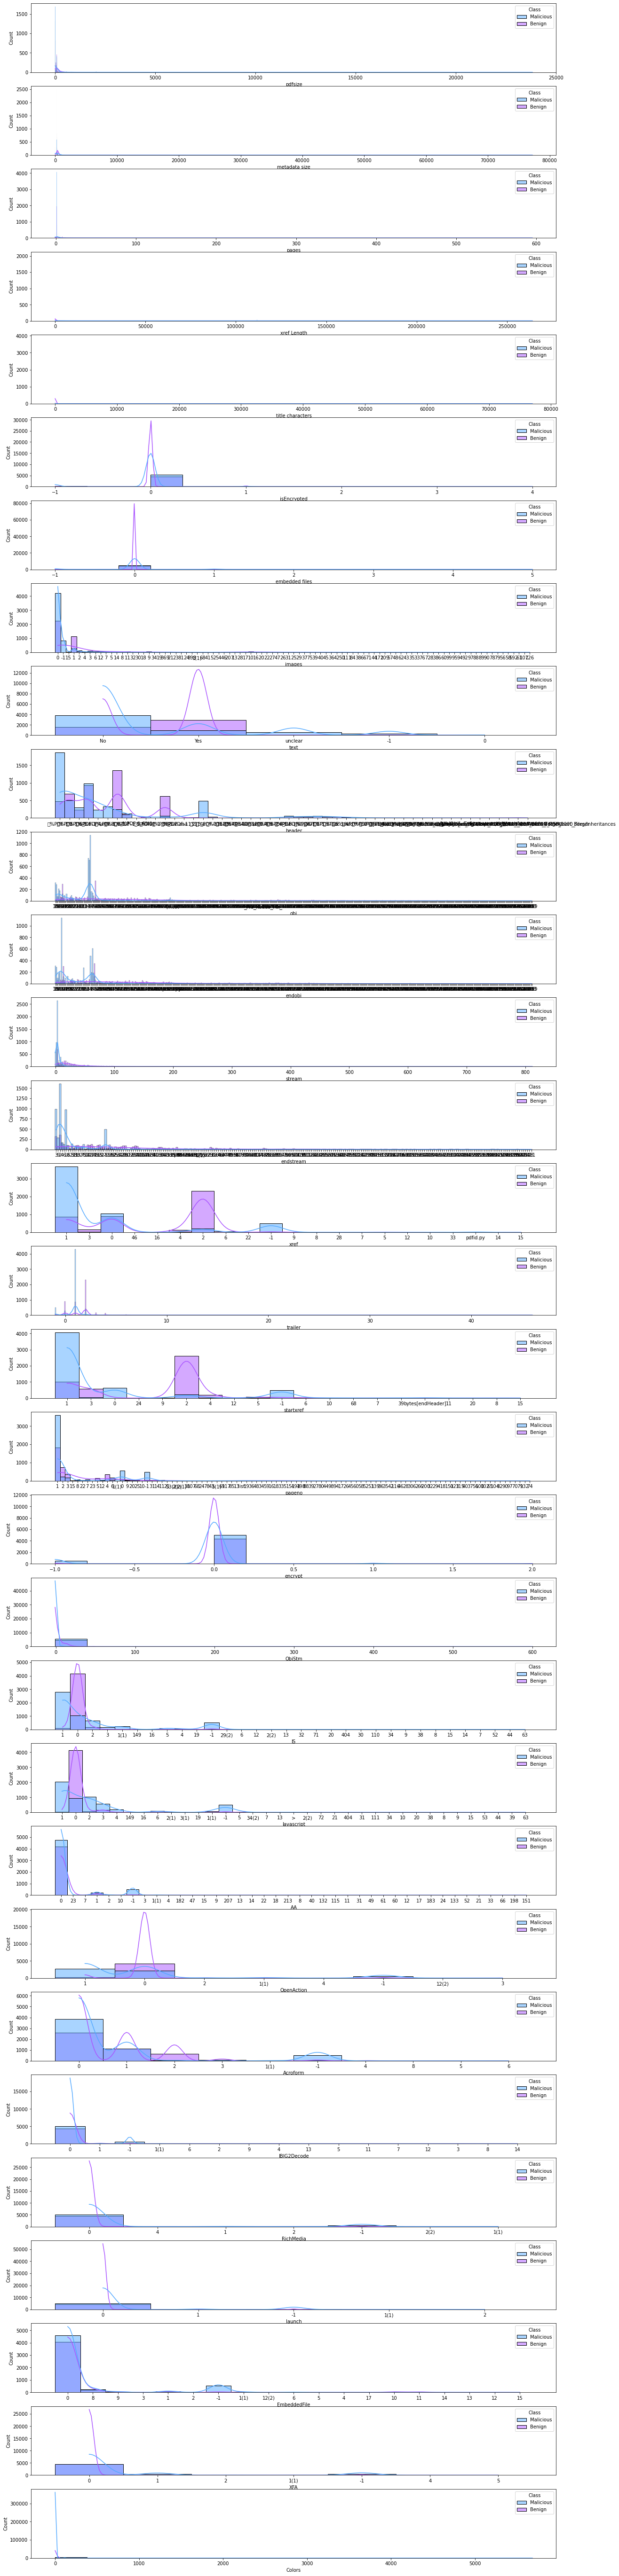

In [13]:
fig, axes = plt.subplots(nrows=31, ncols=1, figsize=(20,100))
for i in range(len(features.columns)):
    col = features.columns[i]
    sns.histplot(x=data[col], hue=T_class, palette="cool", kde=True, ax=axes[i])
plt.show()